In [1]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore
import shapely # type: ignore
from shapely.geometry import Point

import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore


%matplotlib inline

<h1>Statistics of ESTSoil-EH<h1>

In [2]:
#Read EstSoil-EH data

estsoil_12c = "Data/estsoil_soc_pred.shp"
data = gpd.read_file(estsoil_12c,encoding='utf-8')
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,...,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,SOC_pred,geometry
0,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.249855,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
1,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.0,0.0,7.657596,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
2,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,8.418568,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
3,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.0,0.0,6.408071,"POLYGON ((677362.640 6546501.230, 677345.370 6..."
4,5,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.0,0.0,0.000000,0.000000,58.388484,1.255764,0.0,0.0,13.709325,"POLYGON ((677015.810 6548550.780, 677015.910 6..."


In [3]:
#Standart Deviation
data["SOC_pred"].std() 

2.925464828034249

In [4]:
#mean
data["SOC_pred"].mean()

14.5449758917186

In [5]:
data["SOC_pred"].median()

13.320192439044733

In [6]:
data["SOC_pred"].max()

25.44404263456648

In [7]:
data["SOC_pred"].min()

5.49697403993129

In [8]:
data.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'k1', 'awc1', 'z2', 'est_txt2', 'lxtype2',
       'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'k2', 'awc2', 'z3',
       'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3', 'clay3', 'rock3',
       'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4', 'est_crs4', 'sand4', 'silt4',
       'clay4', 'rock4', 'k4', 'awc4', 'unit_area', 'tri_mean', 'tri_stdev',
       'tri_median', 'twi_mean', 'twi_stdev', 'twi_median', 'slp_mean',
       'slp_stdev', 'slp_median', 'ls_mean', 'ls_stdev', 'ls_median',
       'area_drain', 'drain_pct', 'area_arabl', 'arable_pct', 'area_fores',
       'forest_pct', 'area_grass', 'grassland_', 'area_wetla', 'wetland_pc',
       'area_urban', 'urban_pct', 'area_water', 'water_pct', 'area_other',
       'other_pct', 'SOC_pred', 'geometry'],
      dtype='object')

In [9]:
#proportions of the unique values of wrb_main column (ESTSoil-EH)
data.wrb_main.value_counts(normalize=True)

GL    0.177683
UM    0.166308
RG    0.141332
RT    0.130076
HS    0.126790
CM    0.081916
PZ    0.076487
LV    0.071958
FL    0.016218
LP    0.009917
TC    0.001044
AR    0.000270
Name: wrb_main, dtype: float64

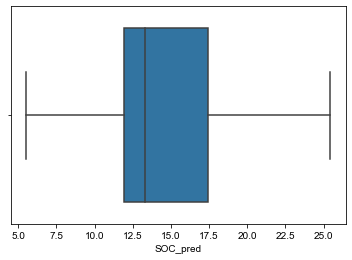

In [10]:
ax = sns.boxplot(x="SOC_pred", data=data)
sns.set(rc={'figure.figsize':(13,8)})

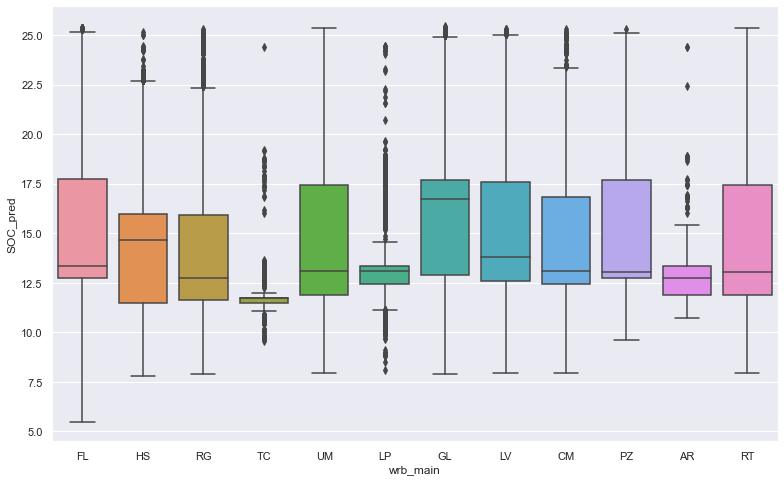

In [11]:
ax = sns.boxplot(x="wrb_main" , y="SOC_pred", data=data)
sns.set(rc={'figure.figsize':(16,9)})

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


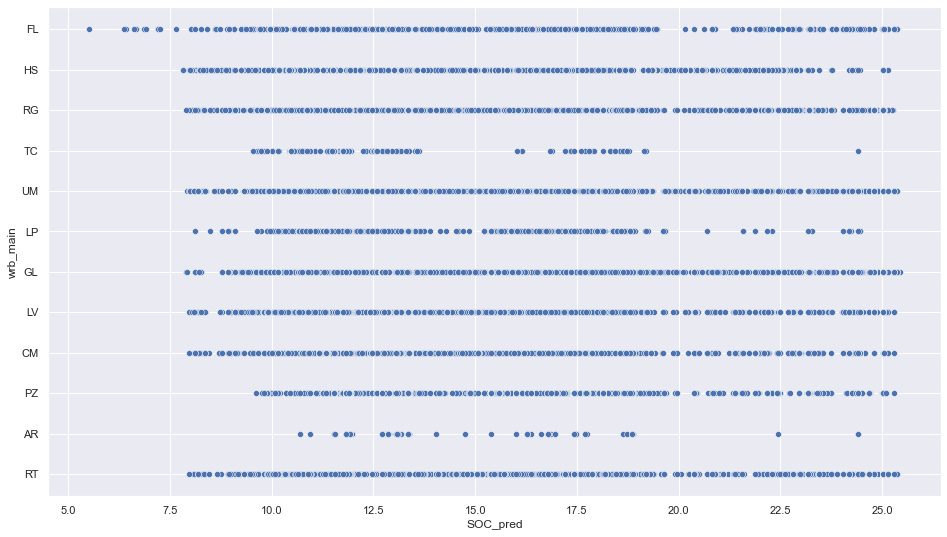

In [12]:
#scatterplot
sns.set_style("darkgrid")
sns.scatterplot(data.SOC_pred, data.wrb_main )
sns.set(rc={'figure.figsize':(19,12)})

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


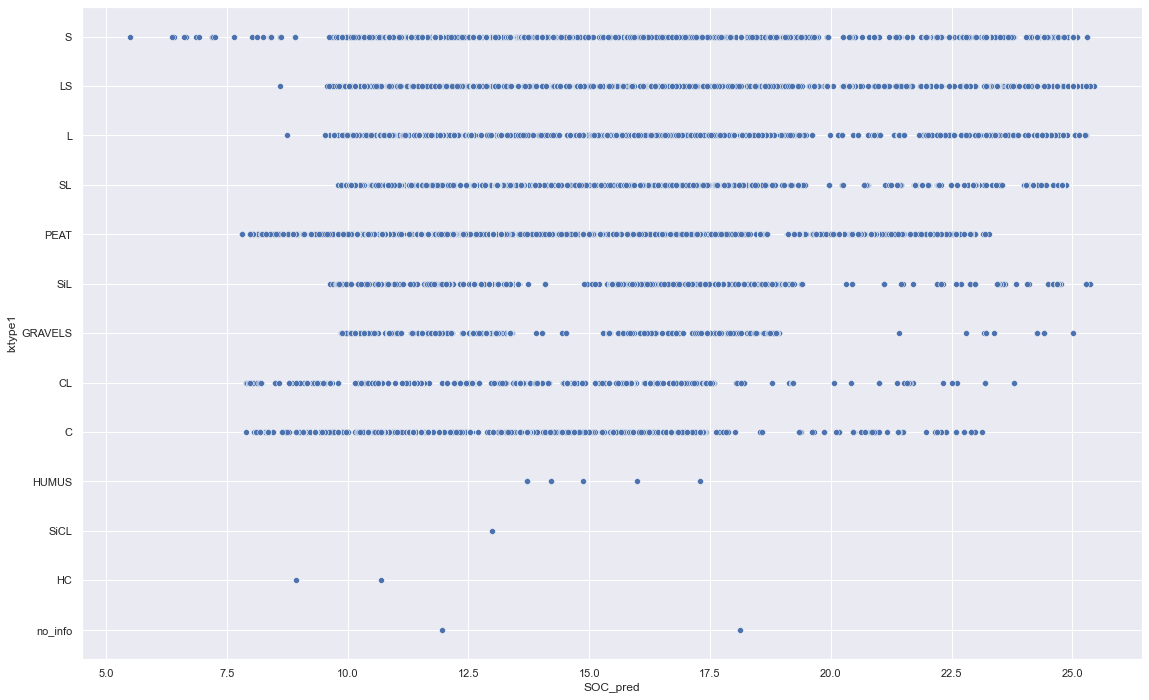

In [13]:
#scatterplot
sns.set_style("darkgrid")
sns.scatterplot(data.SOC_pred, data.lxtype1)
sns.set(rc={'figure.figsize':(19,12)})

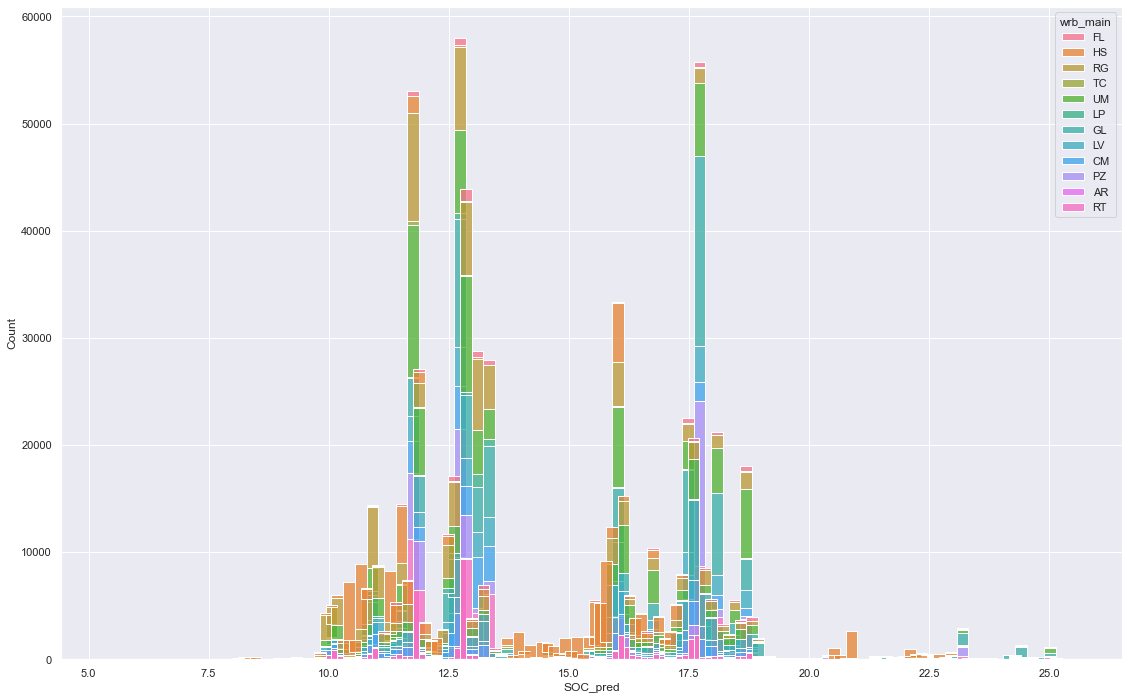

In [14]:
sns.histplot(x = "SOC_pred", data = data, hue = "wrb_main", multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(13,9)})

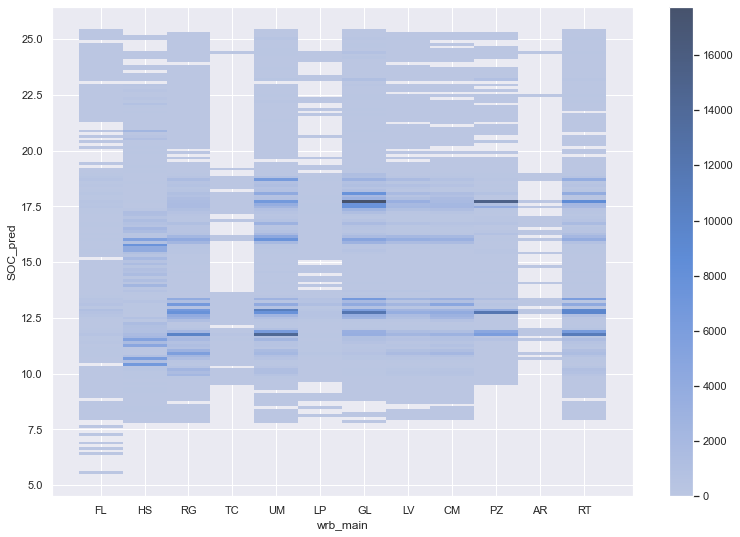

In [15]:
sns.histplot(x="wrb_main", y = "SOC_pred", data= data, cbar=True, shrink =2)
sns.set(rc={'figure.figsize':(19,11)})

<h1>Statistics of Sampling Data<h1>

In [16]:
# read soc data
soc_samples = gpd.read_file('Data\data_deposit_supplements_1.2c\data_deposit_supplements_1.2c\soc_rf_model\soc_rf_redone_3301.gpkg', layer = "soc_train_samples_outrem_origfid_avg")
soc_samples.head()

,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,...,20363.430457,89012.199332,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123)
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,...,0.000000,25583.014316,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518)
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,...,0.000000,1948.785206,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739)
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,...,526.615939,62036.861342,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836)
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',...,149612.185454,354413.777500,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,POINT (376404.901 6468198.723)


In [47]:
list(soc_samples.columns)

['orig_fid',
 'SOC_mean',
 'SOC_std',
 'SOC_med',
 'SOC_min',
 'SOC_max',
 'origin',
 'origin_p',
 's_count',
 'upd_siffer',
 'WRB_code',
 'wrb_main',
 'Boniteet',
 'Varv',
 'Loimis1',
 'loimis_rec',
 'nlayers',
 'SOL_ZMX',
 'SOL_Z1',
 'SOL_Z2',
 'SOL_Z3',
 'SOL_Z4',
 'EST_TXT1',
 'LXTYPE1',
 'EST_CRS1',
 'SOL_SAND1',
 'SOL_SILT1',
 'SOL_CLAY1',
 'SOL_ROCK1',
 'EST_TXT2',
 'LXTYPE2',
 'EST_CRS2',
 'SOL_SAND2',
 'SOL_SILT2',
 'SOL_CLAY2',
 'SOL_ROCK2',
 'EST_TXT3',
 'LXTYPE3',
 'EST_CRS3',
 'SOL_SAND3',
 'SOL_SILT3',
 'SOL_CLAY3',
 'SOL_ROCK3',
 'EST_TXT4',
 'LXTYPE4',
 'EST_CRS4',
 'SOL_SAND4',
 'SOL_SILT4',
 'SOL_CLAY4',
 'SOL_ROCK4',
 'SOL_SOC1',
 'SOL_BD1',
 'SOL_K1',
 'SOL_AWC1',
 'SOL_BD2',
 'SOL_SOC2',
 'SOL_K2',
 'SOL_AWC2',
 'SOL_SOC3',
 'SOL_BD3',
 'SOL_K3',
 'SOL_AWC3',
 'SOL_SOC4',
 'SOL_BD4',
 'SOL_K4',
 'SOL_AWC4',
 'USLE_K',
 'HYDGRP',
 'slp_mean',
 'slp_median',
 'slp_stdev',
 'twi_mean',
 'twi_median',
 'twi_stdev',
 'ls_mean',
 'ls_median',
 'ls_stdev',
 'tri_mean',
 '

In [17]:
#proportions of the unique values of wrb_main column (ESTSoil-EH)
soc_samples.wrb_main.value_counts(normalize=True)

RG    0.192797
GL    0.148305
LP    0.141949
PZ    0.116525
UM    0.099576
HS    0.099576
RT    0.078390
LV    0.059322
CM    0.059322
FL    0.002119
TC    0.002119
Name: wrb_main, dtype: float64

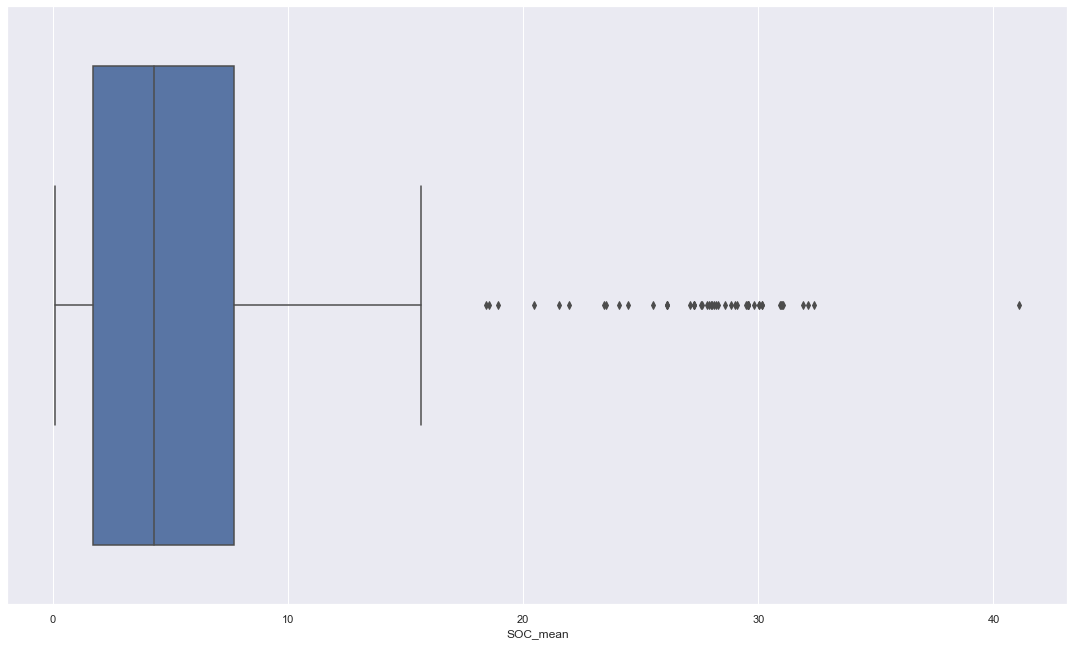

In [18]:
ax = sns.boxplot(x="SOC_mean", data=soc_samples)
sns.set(rc={'figure.figsize':(13,8)})

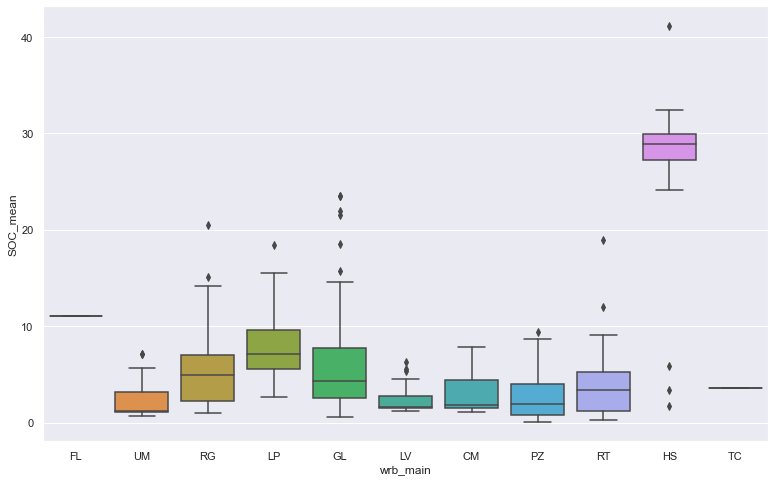

In [19]:
ax = sns.boxplot(x="wrb_main" , y="SOC_mean", data=soc_samples)

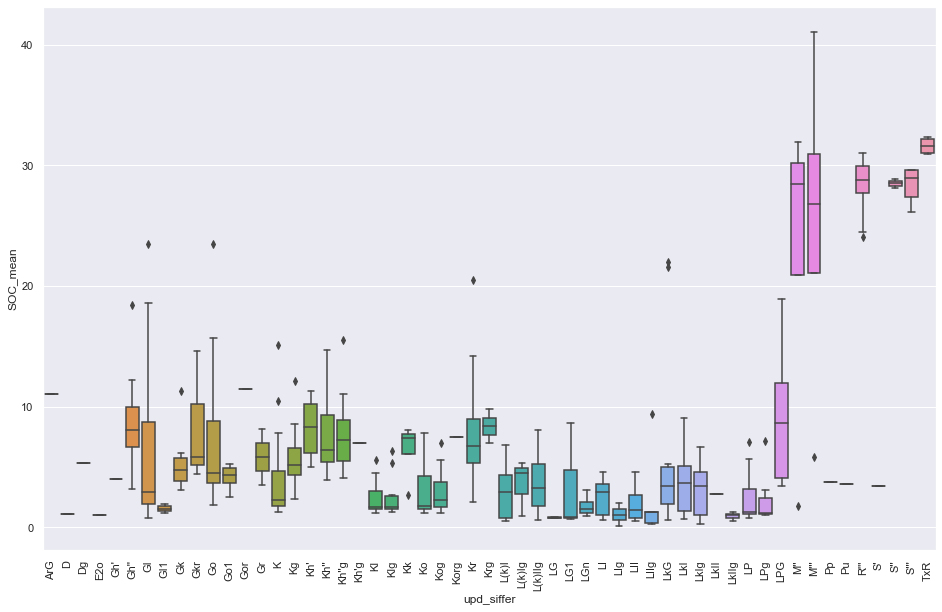

In [131]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16, 10))
sns.boxplot(x=soc_samples['upd_siffer'], y=soc_samples['SOC_mean']);
plt.xticks(rotation = 90)
plt.show()

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOC_mean', ylabel='wrb_main'>

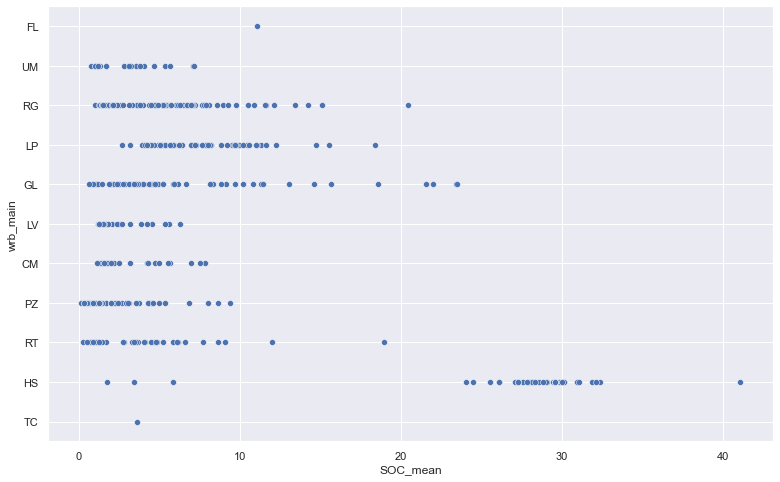

In [20]:
#scatterplot
sns.set_style("darkgrid")
sns.scatterplot(soc_samples.SOC_mean, soc_samples.wrb_main )

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOC_mean', ylabel='LXTYPE1'>

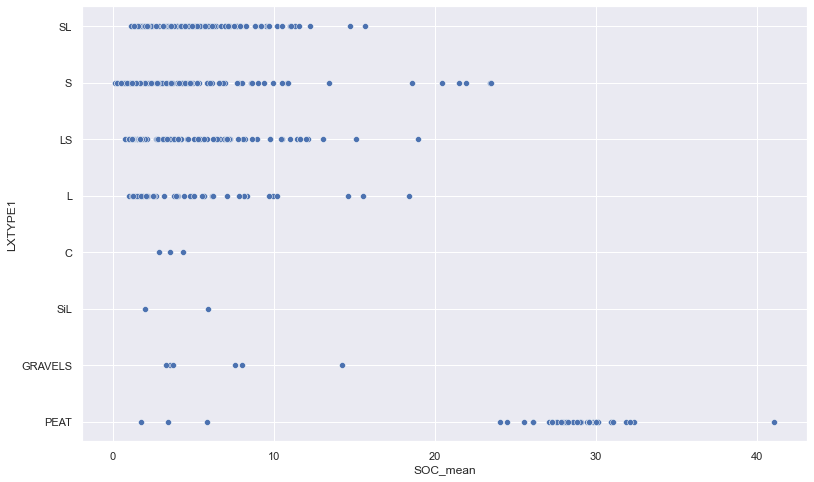

In [21]:
#scatterplot
sns.set_style("darkgrid")
sns.scatterplot(soc_samples.SOC_mean, soc_samples.LXTYPE1 )

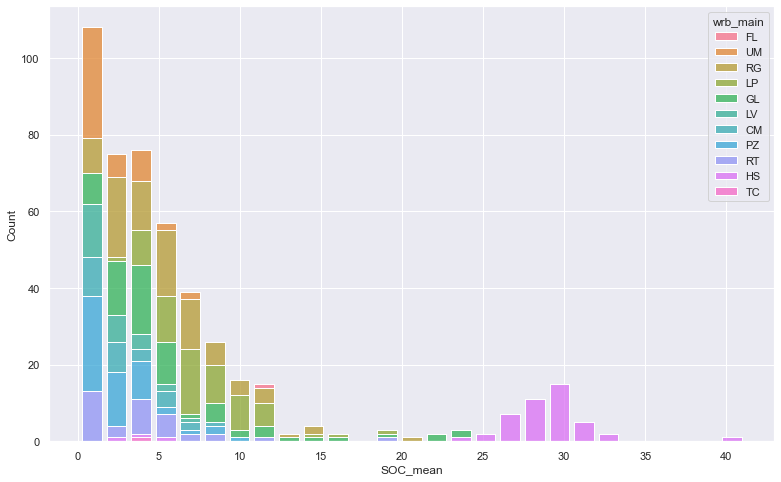

In [22]:
sns.histplot(x = "SOC_mean", data = soc_samples, hue = "wrb_main", multiple ="stack", shrink =0.8) #element = step,poly
sns.set(rc={'figure.figsize':(11,8)})

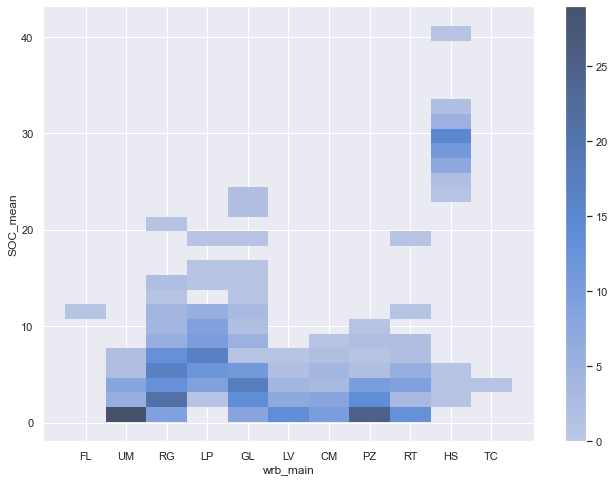

In [23]:
sns.histplot(x="wrb_main", y = "SOC_mean", data= soc_samples, cbar=True)
sns.set(rc={'figure.figsize':(16,10)})
#0-25 observations

In [24]:
processed_data =soc_samples[['orig_fid', 'wrb_main',
       'SOC_mean', 'upd_siffer',  'nlayers', 'SOL_ZMX',
       'SOL_Z1', 'EST_TXT1', 'LXTYPE1', 'EST_CRS1', 'SOL_SAND1', 'SOL_SILT1',
       'SOL_CLAY1',   'slp_mean', 'slp_median',
       'slp_stdev',  'ls_mean','wrb_main','unit_area',
       'ls_median', 'ls_stdev', 'tri_mean', 'tri_median', 'tri_stdev',
       'area_drain', 'drain_pct',  'ao_hor_type', 'ao_hor_sel',
       'area_arable', 'area_forest', 'area_grassland', 'area_wetland',
       'area_urban', 'area_water', 'area_other', 'arable_pct', 'forest_pct',
       'grassland_pct', 'wetland_pct', 'urban_pct', 'water_pct', 'other_pct']]

<AxesSubplot:>

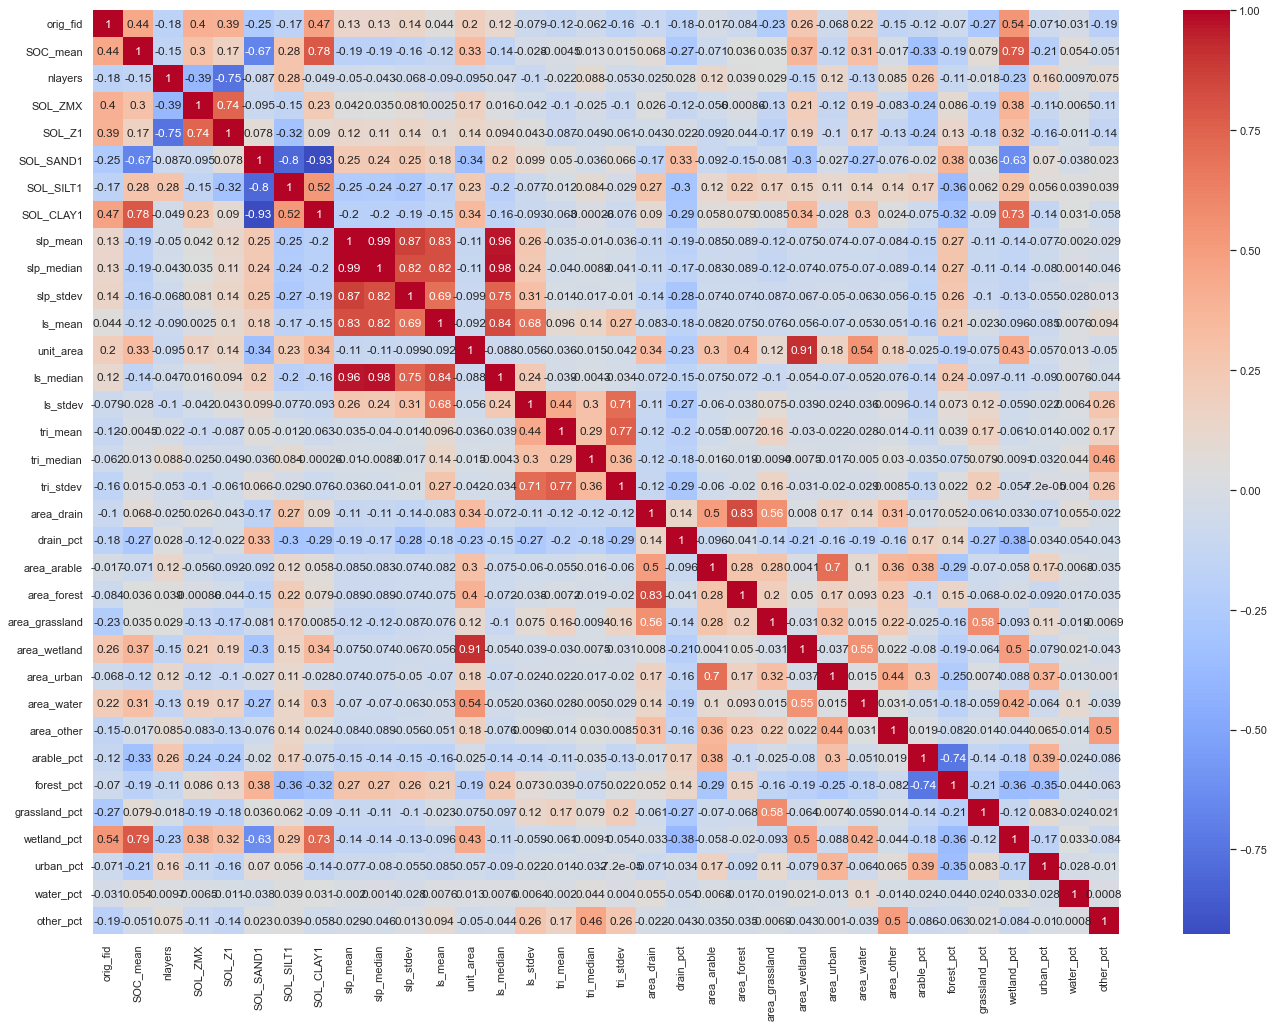

In [25]:
plt.figure(figsize=(23,17))
sns.heatmap(processed_data.corr(), annot = True, cmap ="coolwarm")

<h1>Statistics of Residual SOC on Sampling Data( Observed - Predicted)<h1>

In [26]:
residuals_shp = "Data\soc_residuals\soc_residuals.shp"
residuals = gpd.read_file(residuals_shp,encoding='utf-8')
display(residuals.head())

,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,...,arable_pct,forest_pct,grassland_,wetland_pc,urban_pct,water_pct,other_pct,SOC_pred,SOC_res,geometry
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,...,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,19.735007,-8.656516,POINT (443390.670 6494246.123)
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,...,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,11.134928,-10.078928,POINT (661204.025 6433312.518)
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,...,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.134726,-5.795521,POINT (593729.152 6457480.739)
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,...,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,15.570311,-14.570311,POINT (644275.296 6425833.836)
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',...,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,14.165207,-10.135444,POINT (376404.901 6468198.723)


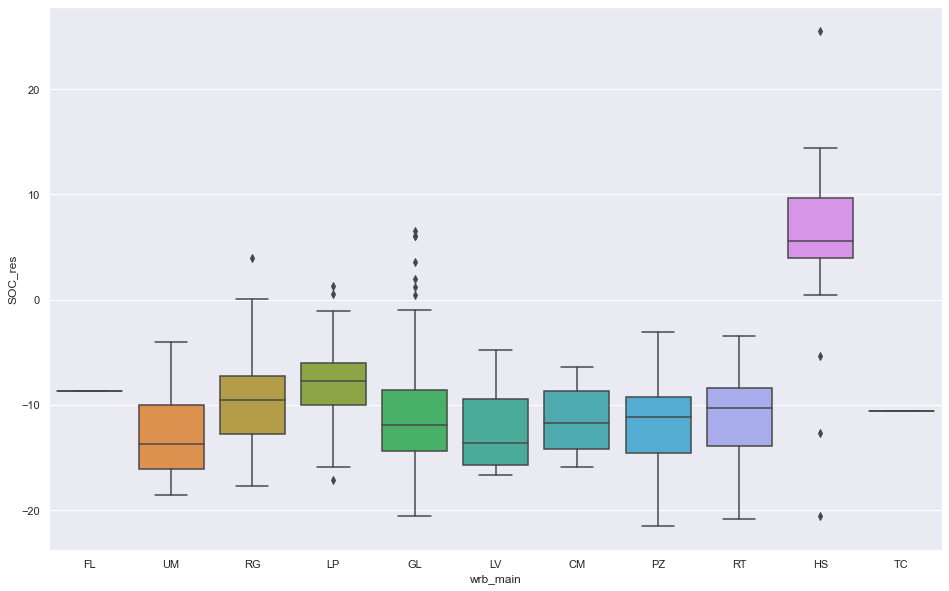

In [27]:
ax = sns.boxplot(x="wrb_main" , y="SOC_res", data=residuals)

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOC_res', ylabel='wrb_main'>

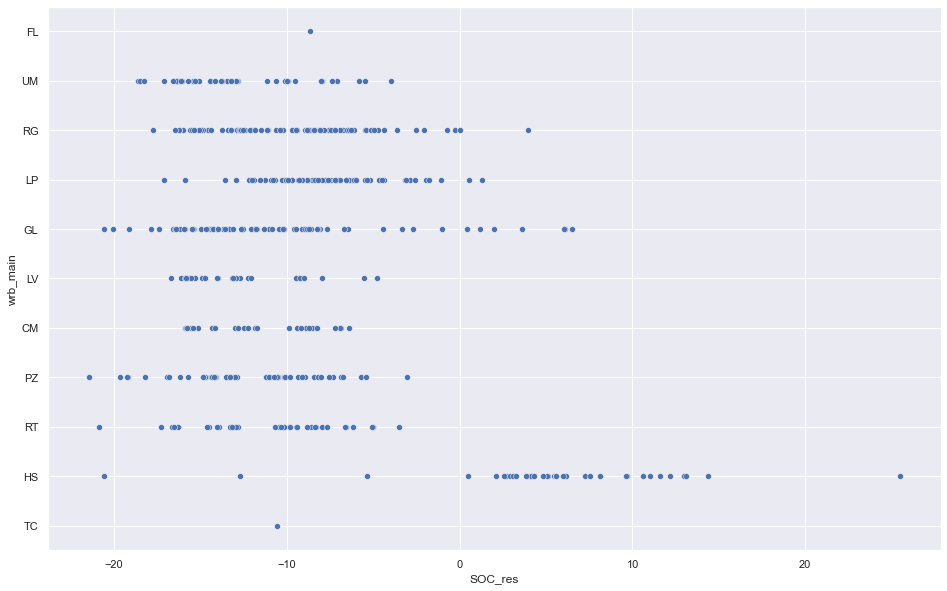

In [28]:
#scatterplot
sns.set_style("darkgrid")
sns.scatterplot(residuals.SOC_res, soc_samples.wrb_main )

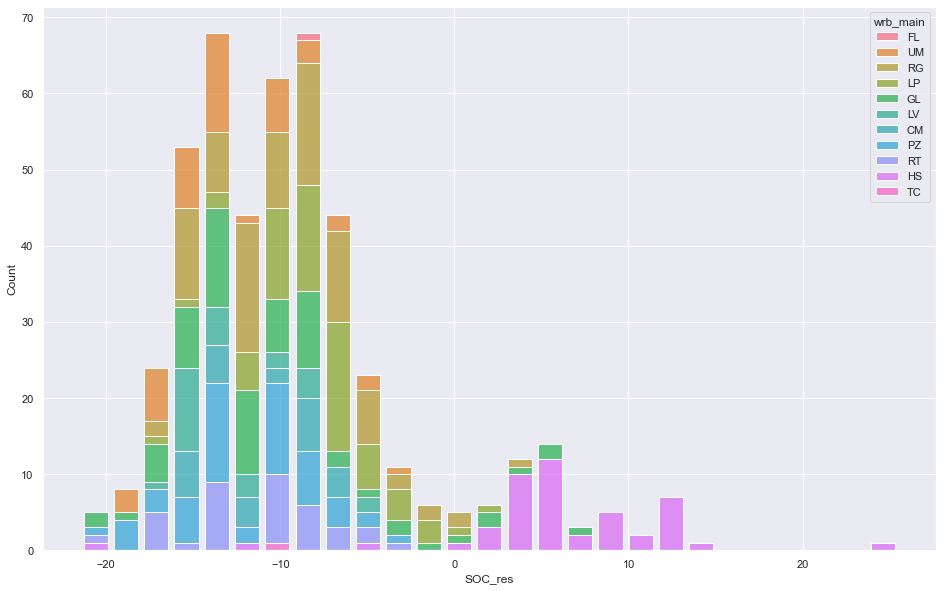

In [29]:
sns.histplot(x = "SOC_res", data = residuals, hue = "wrb_main", multiple ="stack", shrink =0.8) #element = step,poly
sns.set(rc={'figure.figsize':(11,8)})

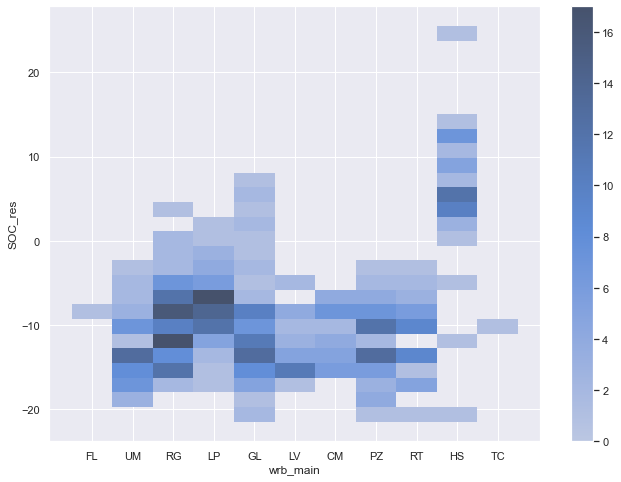

In [30]:
sns.histplot(x="wrb_main", y = "SOC_res", data= residuals, cbar=True)
sns.set(rc={'figure.figsize':(16,10)})
#0-25 observations

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOC_res', ylabel='LXTYPE1'>

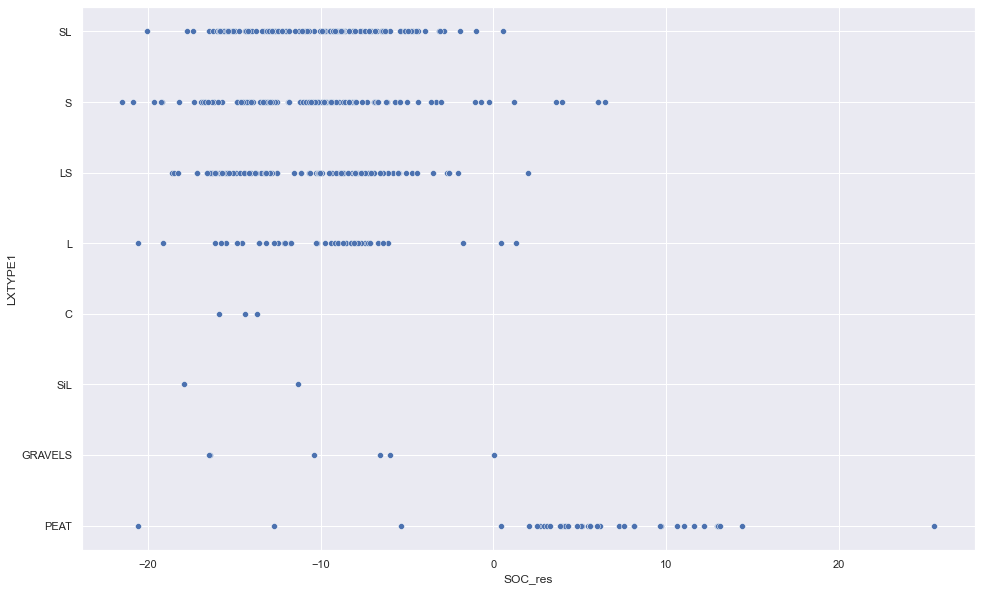

In [31]:
#scatterplot
sns.set_style("darkgrid")
sns.scatterplot(residuals.SOC_res, soc_samples.LXTYPE1)

<h1> Statistics of existing soc values in Estsoil <h1>

In [32]:
estsoil_12c = "Data\EstSoil-EH_v1.2c.shp\EstSoil-EH_v1.2c.shp"
original_soc = gpd.read_file(estsoil_12c,encoding='utf-8')
display(original_soc.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,...,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


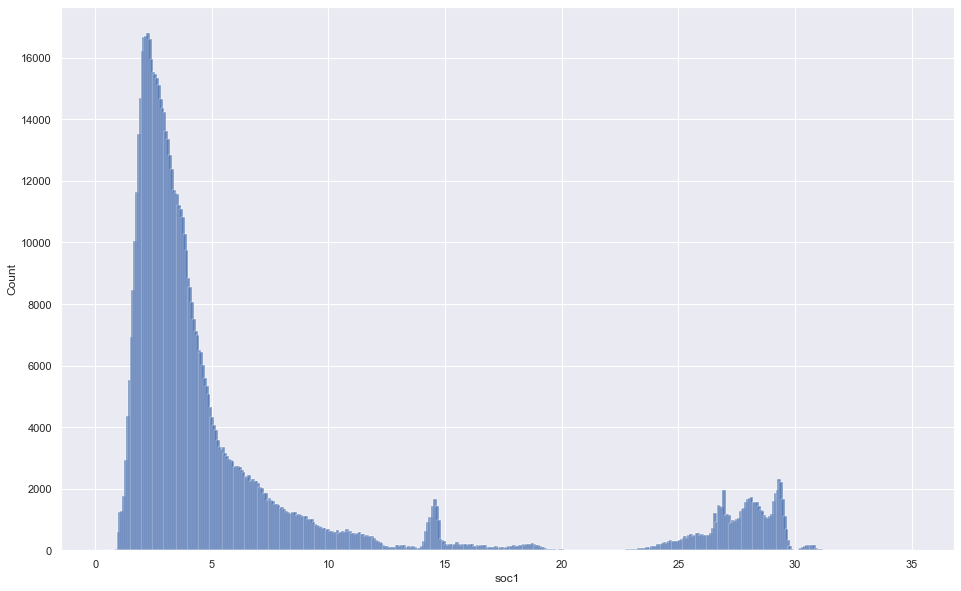

In [33]:
sns.histplot(x = "soc1", data = original_soc, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(12,7)})

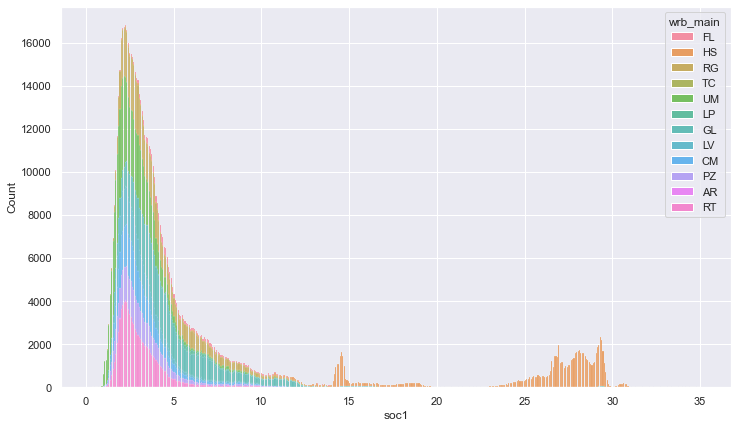

In [34]:
sns.histplot(x = "soc1", data = original_soc, hue = "wrb_main", multiple ="stack", shrink =0.8) #element = step,poly
sns.set(rc={'figure.figsize':(11,8)})

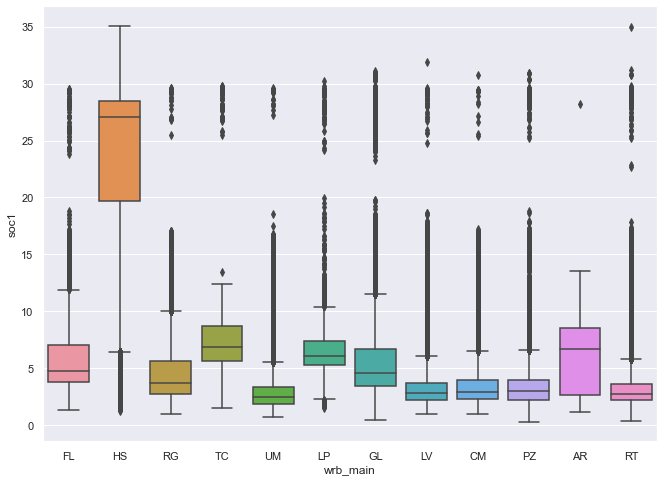

In [35]:
ax = sns.boxplot(x="wrb_main" , y="soc1", data=original_soc)
sns.set(rc={'figure.figsize':(16,9)})

In [36]:
landuse_source = 'data/landuse.shp'

landuse_source = gpd.read_file(landuse_source,encoding='utf-8')
display(landuse_source.head())

,orig_fid,est_soilty,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,...,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,landuse,geometry
0,0,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,other,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,forest,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,grassland,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,grassland,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,grassland,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [37]:
landuse_source.drop(landuse_source[landuse_source['landuse'] == "urban"].index, inplace = True)

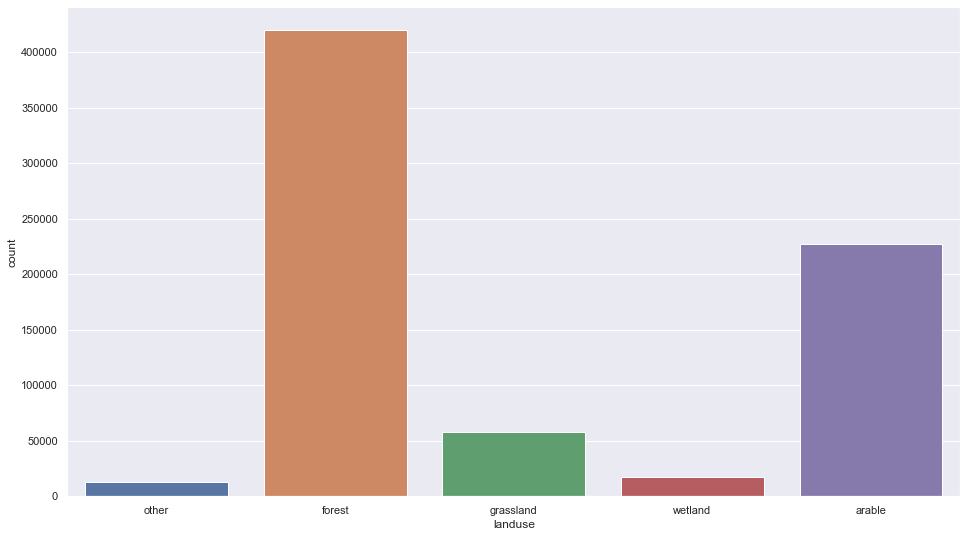

In [38]:
sns.countplot(x = "landuse", data = landuse_source)
sns.set(rc={'figure.figsize':(12,9)})

<h1> Plots for vizualizing land uses in sampling data <h1>

In [39]:
landuse_sample = 'data/landuse_sampledata.shp'

landuse_sample = gpd.read_file(landuse_sample,encoding='utf-8')
display(landuse_sample.head())

,sand1,silt1,clay1,rock1,SOC_mean,wrb_main,slp_mean,slp_median,slp_stdev,twi_mean,...,area_other,arable_pct,forest_pct,grassland_,wetland_pc,urban_pct,water_pct,other_pct,landuse,geometry
0,65,20,15,25,11.078491,FL,1.169605,0.910082,0.901063,9.929913,...,20363.430457,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,grassland,POINT (443390.670 6494246.123)
1,90,5,5,0,1.056000,UM,4.684322,4.218450,1.924464,7.979711,...,0.000000,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,forest,POINT (661204.025 6433312.518)
2,82,9,9,0,5.339205,UM,2.132079,1.824831,1.155190,7.091621,...,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,forest,POINT (593729.152 6457480.739)
3,55,30,15,6,1.000000,RG,1.856459,1.629892,1.202796,6.851544,...,526.615939,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,arable,POINT (644275.296 6425833.836)
4,82,9,9,25,4.029763,LP,0.563358,0.332539,0.544532,9.348648,...,149612.185454,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,forest,POINT (376404.901 6468198.723)


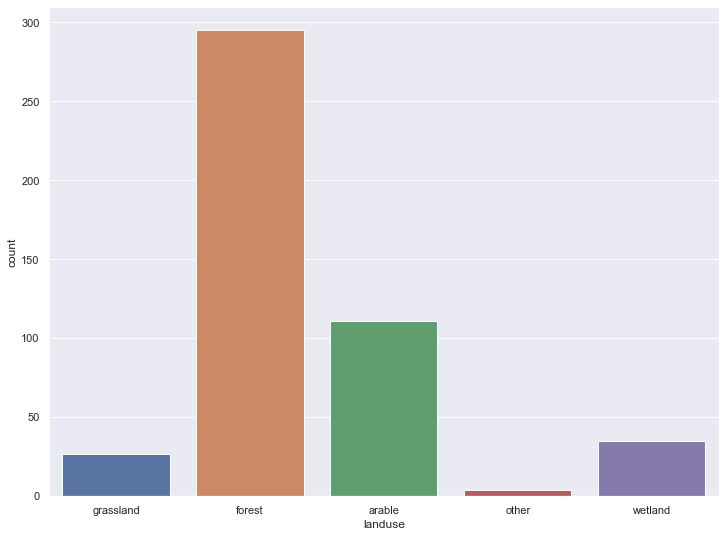

In [40]:

sns.countplot(x = "landuse", data = landuse_sample)
sns.set(rc={'figure.figsize':(12,9)})

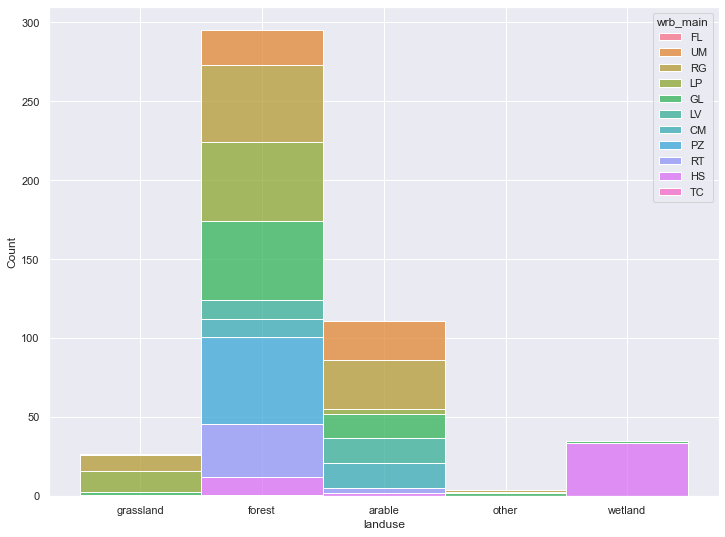

In [41]:


sns.histplot(binwidth=0.5, x="landuse", hue="wrb_main", data=landuse_sample, stat="count", multiple="stack")
sns.set(rc={'figure.figsize':(14,13)})

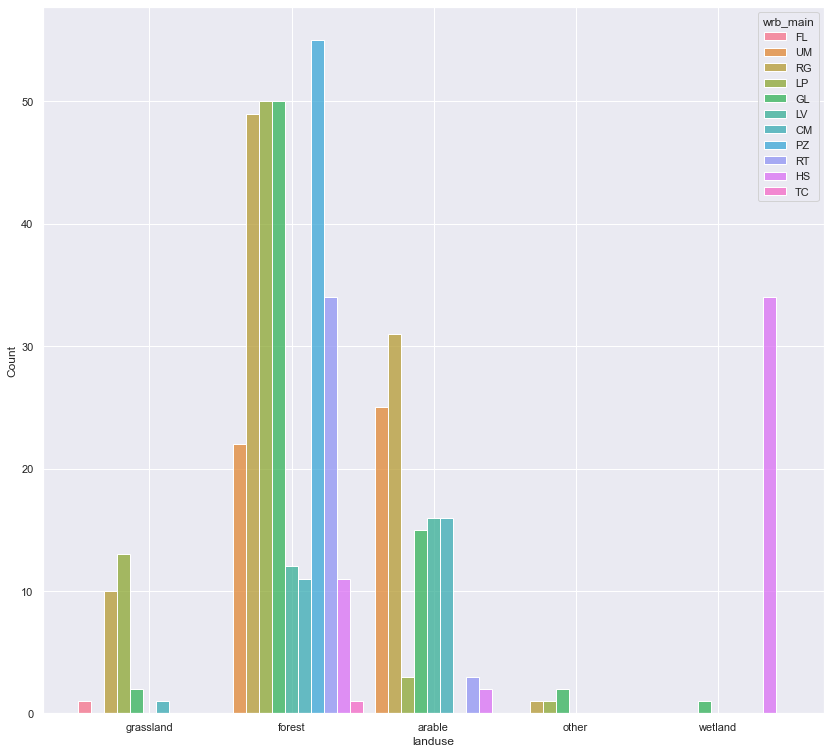

In [42]:
first_dimension = "landuse"
horizontal_label = "x label"
second_dimension = "wrb_main"

sns.histplot(binwidth=1,
            x=first_dimension,
            hue=second_dimension,
            data=landuse_sample,
            stat="count",
            multiple="dodge")

sns.set(rc={'figure.figsize':(15,10)})

<h1> Separate Land Use model <h1>

In [43]:
import geopandas as gpd
separate_landuse = 'data/separate_landuses.shp'
separate_landuse = gpd.read_file(separate_landuse,encoding='utf-8')

In [119]:
separate_landuse.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'k1', 'awc1', 'z2', 'est_txt2', 'lxtype2',
       'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'k2', 'awc2', 'z3',
       'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3', 'clay3', 'rock3',
       'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4', 'est_crs4', 'sand4', 'silt4',
       'clay4', 'rock4', 'k4', 'awc4', 'unit_area', 'tri_mean', 'tri_stdev',
       'tri_median', 'twi_mean', 'twi_stdev', 'twi_median', 'slp_mean',
       'slp_stdev', 'slp_median', 'ls_mean', 'ls_stdev', 'ls_median',
       'area_drain', 'drain_pct', 'area_arabl', 'arable_pct', 'area_fores',
       'forest_pct', 'area_grass', 'grassland_', 'area_wetla', 'wetland_pc',
       'area_urban', 'urban_pct', 'area_water', 'water_pct', 'area_other',
       'other_pct', 'landuse', 'SOC_pred', 'geometry'],
      dtype='object')

In [44]:
processed_sep_landuse = separate_landuse[['sand1', 'silt1', 'clay1', 'rock1', 'slp_mean',
       'slp_median', 'slp_stdev', 'twi_mean', 'twi_median', 'twi_stdev',
       'ls_mean', 'ls_median', 'ls_stdev', 'tri_mean', 'tri_median',
       'tri_stdev','SOC_pred']]

<AxesSubplot:>

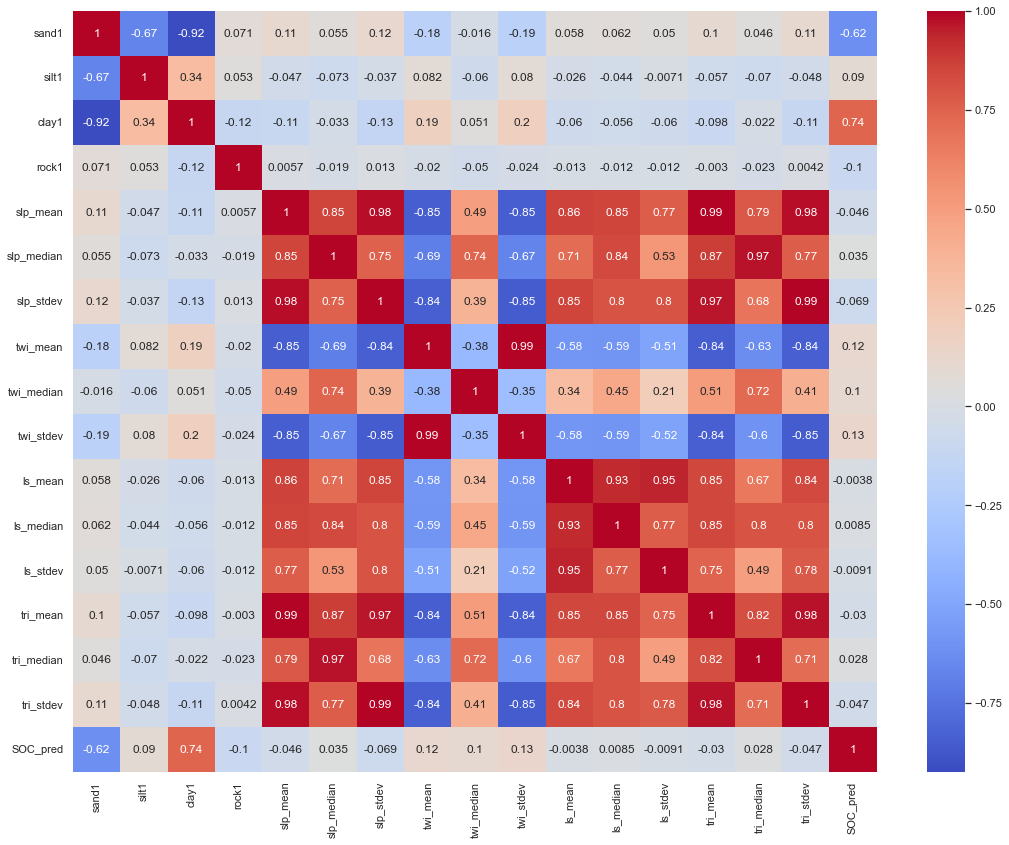

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(18,14))
sns.heatmap(processed_sep_landuse.corr(), annot = True, cmap ="coolwarm")

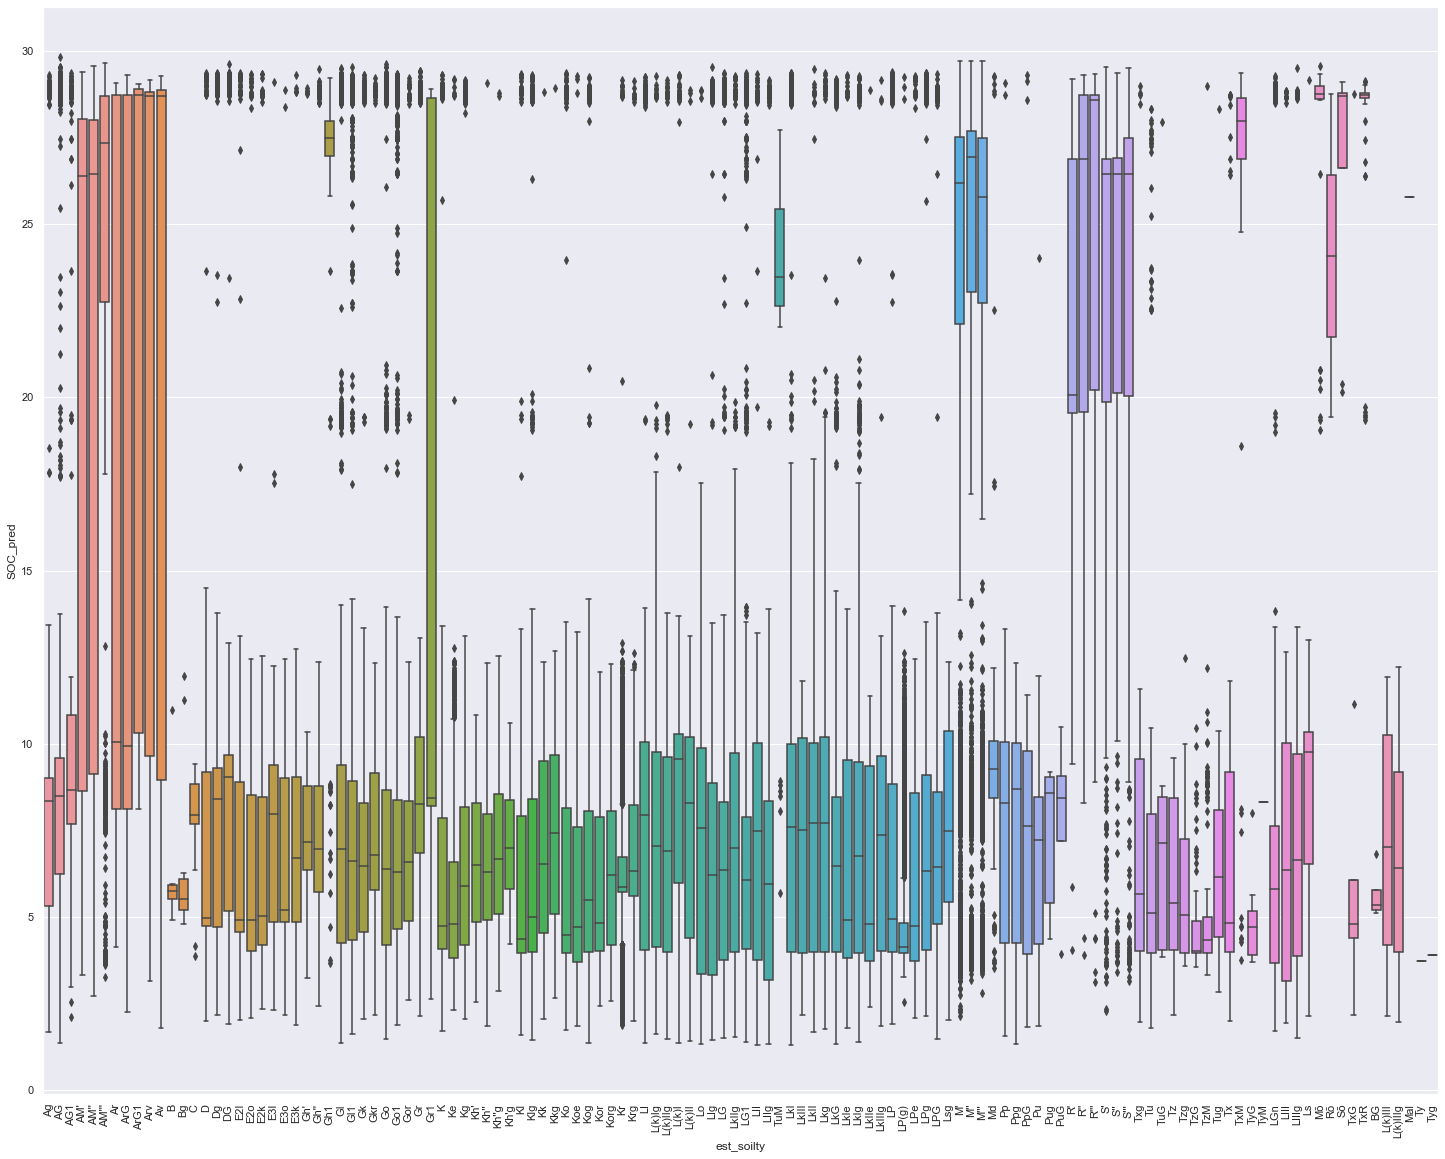

In [175]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(25, 20))
sns.boxplot(x=separate_landuse['est_soilty'], y=separate_landuse['SOC_pred']);
plt.xticks(rotation = 90)
plt.show()

<h1> Base model <h1>

In [139]:
final_base_model = 'data/soc_final_basemodel_reproduce.shp'
final_base_model = gpd.read_file(final_base_model,encoding='utf-8')


In [142]:
final_base_model.columns

Index(['orig_fid', 'est_soilty', 'wrb_main', 'est_txcode', 'nlayers', 'zmx',
       'z1', 'est_txt1', 'lxtype1', 'sand1', 'silt1', 'clay1', 'rock1', 'k1',
       'awc1', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean', 'twi_stdev',
       'twi_median', 'slp_mean', 'slp_stdev', 'slp_median', 'ls_mean',
       'ls_stdev', 'ls_median', 'area_drain', 'drain_pct', 'area_arabl',
       'arable_pct', 'area_fores', 'forest_pct', 'area_grass', 'grassland_',
       'area_wetla', 'wetland_pc', 'area_urban', 'urban_pct', 'area_water',
       'water_pct', 'area_other', 'other_pct', 'SOC_pred', 'geometry'],
      dtype='object')

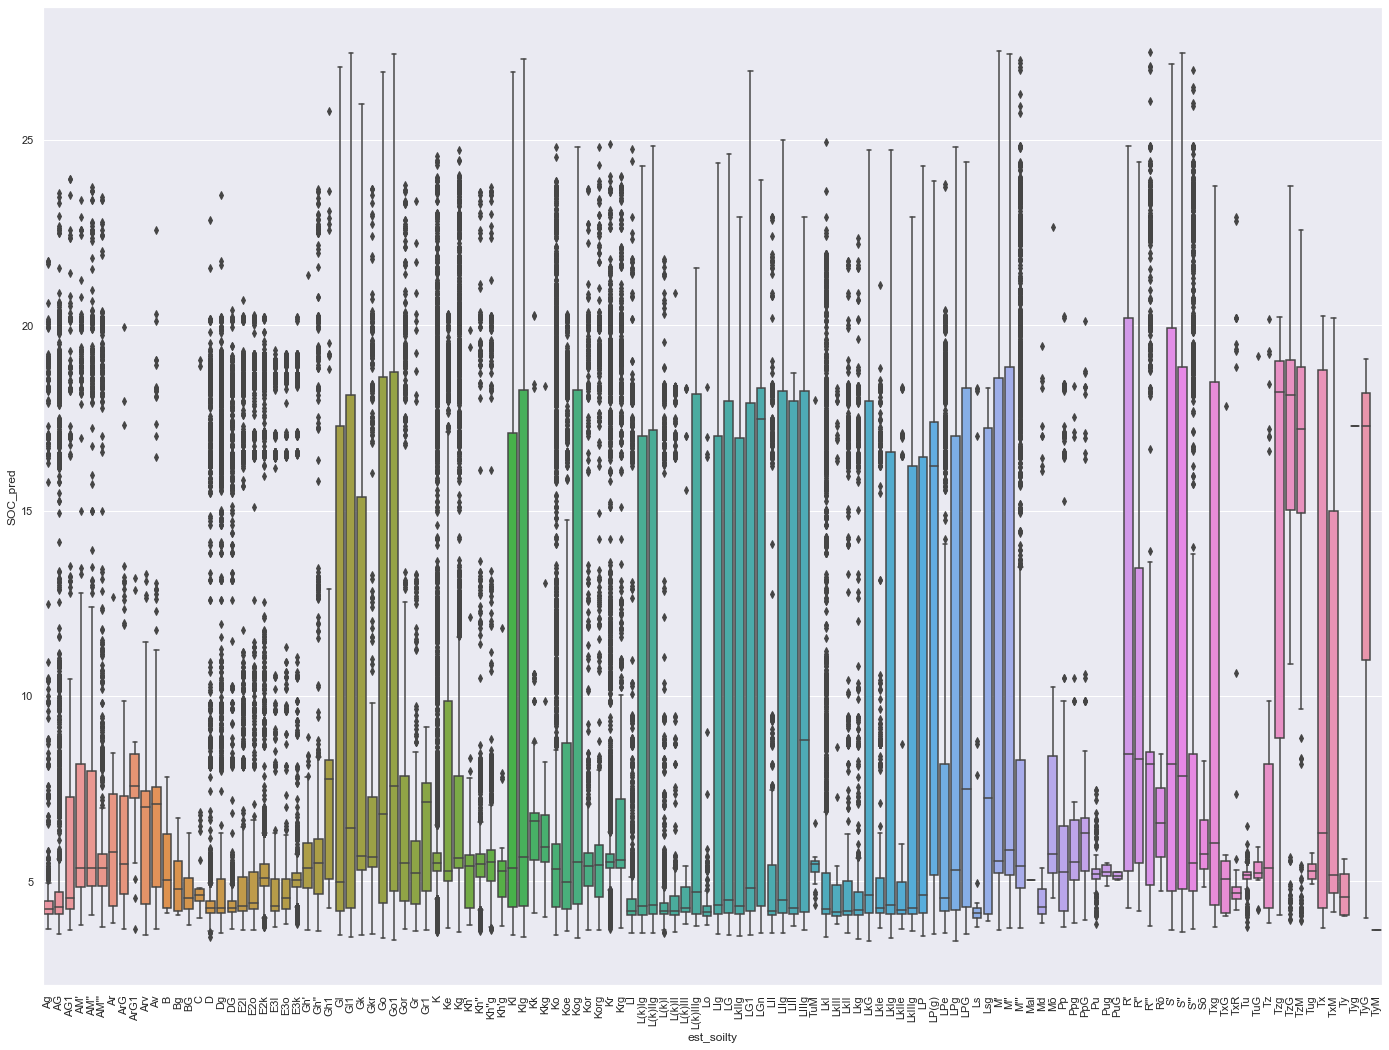

In [173]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(24, 18))
sns.boxplot(x=final_base_model['est_soilty'], y=final_base_model['SOC_pred']);
plt.xticks(rotation = 90)
plt.show()